In [1]:
import numpy as np
from scipy.stats import norm, binom
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Psycometric function 1

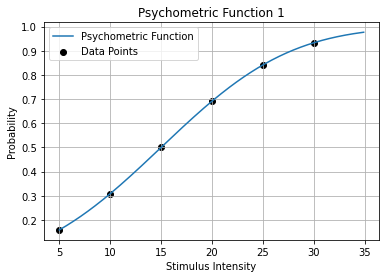

In [2]:
# We define the first psycometric function. I is an array with the values of the intensity of the stimulus, c and sigma are the parameters of the psycometric function
def psycometric_1(I, c, sigma):                 # c (Criterion): The "c" parameter in a psychometric function represents the criterion or bias of the decision maker. It determines the position along the stimulus axis at which the decision maker is equally likely to respond with one of the
    return [norm.cdf(i, c, sigma) for i in I]   # sigma parameter in a psychometric function represents sensitivity or discrimination ability. It determines how well the decision maker can discriminate between different levels of the stimulus.

# We calculate the real points given the data
I = np.arange(5,35,5) 
c1 = max(I) / 2
sigma1 = max(I) / 3
Psycometric_1 = psycometric_1(I, c1, sigma1)

# We calculate more points for the plot so I can Interpolate more values and have a smoother plot
I_plot = np.arange(5, 35, 0.1)
plot_points_1 = psycometric_1(I_plot, c1, sigma1)

# Plot the psychometric function
plt.plot(I_plot, plot_points_1, label='Psychometric Function')
plt.scatter(I, Psycometric_1, label='Data Points',color='black')
plt.xlabel('Stimulus Intensity')
plt.ylabel('Probability')
plt.title('Psychometric Function 1')
plt.grid(True)
plt.legend()
plt.show()


Psycometric function 2

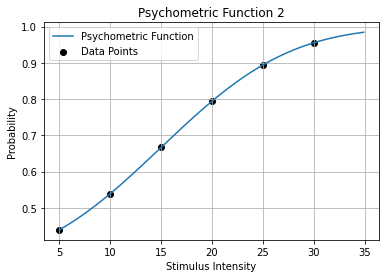

In [3]:
# We define the second psycometric function. Now we have an other parameter called P_guess, it is the probability of guessing correctly "randomly". We can calculate it as 1/Number of options.
def psycometric_2(I, c, sigma, P_guess):
    return [(1 - P_guess) * norm.cdf(i, c, sigma) + P_guess for i in I]

I = np.arange(5,35,5)  
Nr = 3           #In a 3-alternative classification task (specified in the exercise), we have 3 different outcomes
P_guess = 1/Nr
c2 = max(I) / 2
sigma2 = max(I) / 3
Psycometric_2 = psycometric_2(I, c2, sigma2, P_guess)

#We calculate more points for the plot so I can Interpolate more values and have a smoother plot. (as we did before)
I_plot = np.arange(5, 35, 0.1)
plot_points_2 = psycometric_2(I_plot, c2, sigma2, P_guess)

plt.plot(I_plot, plot_points_2, label='Psychometric Function')
plt.scatter(I, Psycometric_2, label='Data Points',color='black')
plt.xlabel('Stimulus Intensity')
plt.ylabel('Probability')
plt.title('Psychometric Function 2')
plt.grid(True)
plt.legend()
plt.show()


Psycometric function 3

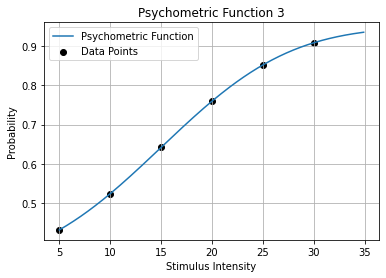

In [4]:
# We define the third psycometric function. Now we have an other parameter called P_lapse. Lapsing is when an observer fails to perform the task perhaps due to a lapse in attention. We can guess a 0.05 value.
def psycometric_3(I, c, sigma, P_guess, P_lapse):
    return [(1 - P_guess - P_lapse) * norm.cdf(i, c, sigma) + P_guess for i in I]

I = np.arange(5,35, 5)  
Nr = 3           #In a 3-alternative classification task
P_guess = 1/Nr
c3 = max(I) / 2
sigma3 = max(I) / 3
P_lapse = 0.05
Psycometric_3 = psycometric_3(I, c3, sigma3, P_guess, P_lapse)

# We calculate more points for the plot so I can Interpolate more values and have a smoother plot
I_plot = np.arange(5,35, 0.1)
plot_points_3 = psycometric_3(I_plot, c3, sigma3, P_guess, P_lapse)

plt.plot(I_plot, plot_points_3, label='Psychometric Function')
plt.scatter(I, Psycometric_3, label='Data Points',color='black')
plt.xlabel('Stimulus Intensity')
plt.ylabel('Probability')
plt.title('Psychometric Function 3')
plt.grid(True)
plt.legend()
plt.show()

Plot of the 3 Psycometric functions 

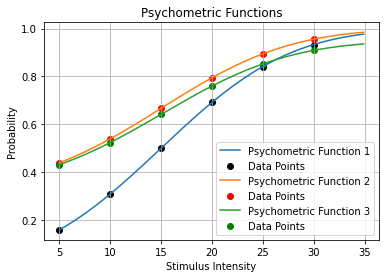

In [5]:
# We plot all the 3 psycometric functions in one graph.
plt.plot(I_plot, plot_points_1, label='Psychometric Function 1')
plt.scatter(I, Psycometric_1, label='Data Points',color='black')

plt.plot(I_plot, plot_points_2, label='Psychometric Function 2')
plt.scatter(I, Psycometric_2, label='Data Points',color='red')

plt.plot(I_plot, plot_points_3, label='Psychometric Function 3')
plt.scatter(I, Psycometric_3, label='Data Points',color='green')

plt.xlabel('Stimulus Intensity')
plt.ylabel('Probability')
plt.title('Psychometric Functions')
plt.grid(True)
plt.legend()
plt.show()

Negative Log-likelihood


In [6]:
#We are going to use the negative log likelihood function to find the optimal parameters for our psychometric functions.
def negative_log_likelihood(params, I, N_correct, N_s, function='psycometric_1', fixed_params = None):
    c, sigma = params[0],params[1]
    if function == 'psycometric_1':
        probabilities = psycometric_1(I, c, sigma)
    elif function == 'psycometric_2':
        P_guess = fixed_params[0]
        probabilities = psycometric_2(I, c, sigma, P_guess)
    elif function == 'psycometric_3':
        P_guess, P_lapse = fixed_params[0], fixed_params[1]
        probabilities = psycometric_3(I, c, sigma, P_guess, P_lapse)
    else:
        raise ValueError("Invalid function name. Supported functions: 'psycometric_1', 'psycometric_2', 'psycometric_3'")

    log_likelihood = sum([binom.logpmf(N, N_s, p) for N, p in zip(N_correct, probabilities)])   # We can see the likelihood of a point as how possible is to have a value given a function with theirs parameters. In this case, the likelihood of each point can be calculated using a binomial distribution. Then to see the likelihood of all the 6 points of the intensity of the stimulus, we should multiply their likelihood because we consider them i.i.d points, however we are using the log-likelihood so we can sum their logarithms.
    return -log_likelihood

Data from the exercice


In [7]:
#General Data from the exercice
I = np.arange(5,35,5)               #Arange of the 6 values of the intensity of the stimulus
N_s = 30                            #Numer of experiments for each intensity of the stimulus
N_correct = [12,11,19,27,30, 30]    #Number of correct responses for each intensity of the stimulis

Optimized Psycometric function 1

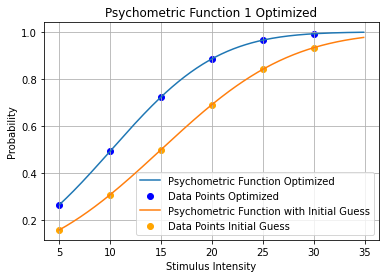

Initial Guess Parameters:
c_initial_guess: 15.0
sigma_initial_guess: 10.0

Optimized Parameters:
c1_optimized: 10.131850786071528
sigma1_optimized: 8.190823465588204

Log-likelihood Results:
Initial Guess Parameters: 24.470856454746436
Optimized Parameters: 11.315347372642556


In [8]:
# We define the initial guess for the psychometric function.
c_initial_guess = max(I)/2   
sigma_initial_guess = max(I)/3
initial_guess = [c_initial_guess, sigma_initial_guess]

# We optimize the negative log likelihood function
optimized_parameters = minimize(negative_log_likelihood, initial_guess, args=(I, N_correct, N_s, 'psycometric_1'))   #We optimize using minimize function from scipy library
c1_optimized, sigma1_optimized = optimized_parameters.x

# Plot the psychometric function optimized
I_plot = np.arange(5, 35, 0.1)
Psycometric_1_optimized = psycometric_1(I, c1_optimized, sigma1_optimized)          #Reminder, these are the real stimulus we have in our data
plot_points_1_optimized = psycometric_1(I_plot, c1_optimized, sigma1_optimized)     #These are some points generated for interpolate points between data and have smoother plot

plt.plot(I_plot, plot_points_1_optimized, label='Psychometric Function Optimized')
plt.scatter(I, Psycometric_1_optimized, label='Data Points Optimized',color='blue')
plt.xlabel('Stimulus Intensity')
plt.ylabel('Probability')
plt.title('Psychometric Function 1 Optimized')

#Plot the psychometric function with initial guess
Psycometric_1 = psycometric_1(I, c_initial_guess, sigma_initial_guess)  
plot_points_1 = psycometric_1(I_plot, c_initial_guess, sigma_initial_guess) 

plt.plot(I_plot, plot_points_1, label='Psychometric Function with Initial Guess')
plt.scatter(I, Psycometric_1, label='Data Points Initial Guess',color='orange')

plt.grid(True)
plt.legend()
plt.show()

# Print the final parameters 
result_optimize_1 = negative_log_likelihood(optimized_parameters.x, I, N_correct, N_s,'psycometric_1')
result_initial_guess_1 = negative_log_likelihood(initial_guess, I, N_correct, N_s,'psycometric_1')

#Initial Guess Parameters:
print('Initial Guess Parameters:')
print('c_initial_guess:', c_initial_guess)
print('sigma_initial_guess:', sigma_initial_guess)

#Optimized Parameters:
print('\nOptimized Parameters:')
print('c1_optimized:', c1_optimized)
print('sigma1_optimized:', sigma1_optimized)

# Log-likelihood:
print('\nLog-likelihood Results:')
print('Initial Guess Parameters:', result_initial_guess_1)
print('Optimized Parameters:', result_optimize_1)

Optimized Psycometric function 2


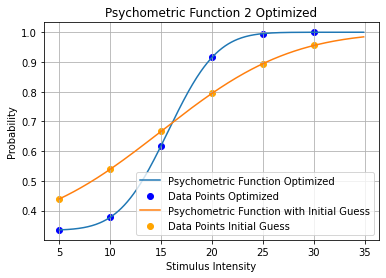

Initial Guess Parameters:
c_initial_guess: 15.0
sigma_initial_guess: 10.0

Optimized Parameters:
c2_optimized: 15.692029027493417
sigma2_optimized: 3.778083581322479

Log-likelihood Results:
Initial Guess Parameters: 15.050269346299803
Optimized Parameters: 7.637350852187257


In [9]:
# We define the initial guess for the psychometric function.
c_initial_guess = max(I)/2   
sigma_initial_guess = max(I)/3
initial_guess = [c_initial_guess, sigma_initial_guess]

# We define the fixed parameters for the psychometric function. For the Psycometric function 2 just P_guess.
Nr = 3                      #In a 3-alternative classification task
P_guess = 1/Nr
fixed_params = [P_guess]    #In this case, the fixed parameters are P_guess, which is the probability of 1/Number of alternative

# We optimize the negative log likelihood function
optimized_parameters = minimize(negative_log_likelihood, initial_guess, args=(I, N_correct, N_s, 'psycometric_2',fixed_params))
c2_optimized, sigma2_optimized = optimized_parameters.x

# Plot the psychometric function optimized
I_plot = np.arange(5, 35, 0.1)
Psycometric_2_optimized = psycometric_2(I, c2_optimized, sigma2_optimized, P_guess)          
plot_points_2_optimized = psycometric_2(I_plot, c2_optimized, sigma2_optimized, P_guess)     

plt.plot(I_plot, plot_points_2_optimized, label='Psychometric Function Optimized')
plt.scatter(I, Psycometric_2_optimized, label='Data Points Optimized',color='blue')
plt.xlabel('Stimulus Intensity')
plt.ylabel('Probability')
plt.title('Psychometric Function 2 Optimized')

#Plot the psychometric function with initial guess
Psycometric_2 = psycometric_2(I, c_initial_guess, sigma_initial_guess, P_guess)  
plot_points_2 = psycometric_2(I_plot, c_initial_guess, sigma_initial_guess, P_guess) 

plt.plot(I_plot, plot_points_2, label='Psychometric Function with Initial Guess')
plt.scatter(I, Psycometric_2, label='Data Points Initial Guess',color='orange')

plt.grid(True)
plt.legend()
plt.show()

# Print the final parameters 
result_optimize_2 = negative_log_likelihood(optimized_parameters.x, I, N_correct, N_s,'psycometric_2',fixed_params)
result_initial_guess_2 = negative_log_likelihood(initial_guess, I, N_correct, N_s,'psycometric_2',fixed_params)

#Initial Guess Parameters:
print('Initial Guess Parameters:')
print('c_initial_guess:', c_initial_guess)
print('sigma_initial_guess:', sigma_initial_guess)

#Optimized Parameters:
print('\nOptimized Parameters:')
print('c2_optimized:', c2_optimized)
print('sigma2_optimized:', sigma2_optimized)

# Log-likelihood:
print('\nLog-likelihood Results:')
print('Initial Guess Parameters:', result_initial_guess_2)
print('Optimized Parameters:', result_optimize_2)

Optimized Psycometric function 3


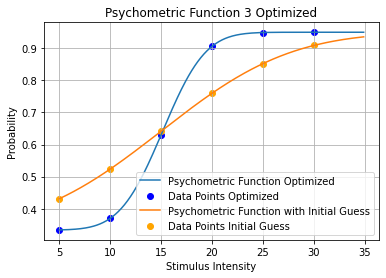

Initial Guess Parameters:
c_initial_guess: 15.0
sigma_initial_guess: 10.0

Optimized Parameters:
c3_optimized: 15.153444906940466
sigma3_optimized: 3.3061646002491725

Log-likelihood Results:
Initial Guess Parameters: 18.32393985566842
Optimized Parameters: 10.554681739015605


In [10]:
# We define the initial guess for the psychometric function.
c_initial_guess = max(I)/2   
sigma_initial_guess = max(I)/3
initial_guess = [c_initial_guess, sigma_initial_guess]

# We define the fixed parameters for the psychometric function. For the Psycometric function 3 we need P_guess and P_lapse.
Nr = 3                              #In a 3-alternative classification task
P_guess = 1/Nr                      #P_guess which is 1/Number of alternative
P_lapse = 0.05                      #Lapsing is when an observer fails to perform the task perhaps due to a lapse in attention. We can guess a 0.05 value
fixed_params = [P_guess, P_lapse]   #In this case, the fixed parameters are P_guess and P_lapse

# We optimize the negative log likelihood function
optimized_parameters = minimize(negative_log_likelihood, initial_guess, args=(I, N_correct, N_s, 'psycometric_3',fixed_params))
c3_optimized, sigma3_optimized = optimized_parameters.x

# Plot the psychometric function optimized
I_plot = np.arange(5, 35, 0.1)
Psycometric_3_optimized = psycometric_3(I, c3_optimized, sigma3_optimized, P_guess, P_lapse)          
plot_points_3_optimized = psycometric_3(I_plot, c3_optimized, sigma3_optimized, P_guess, P_lapse)     

plt.plot(I_plot, plot_points_3_optimized, label='Psychometric Function Optimized')
plt.scatter(I, Psycometric_3_optimized, label='Data Points Optimized',color='blue')
plt.xlabel('Stimulus Intensity')
plt.ylabel('Probability')
plt.title('Psychometric Function 3 Optimized')

#Plot the psychometric function with initial guess
Psycometric_3 = psycometric_3(I, c_initial_guess, sigma_initial_guess, P_guess, P_lapse)  
plot_points_3 = psycometric_3(I_plot, c_initial_guess, sigma_initial_guess, P_guess, P_lapse) 

plt.plot(I_plot, plot_points_3, label='Psychometric Function with Initial Guess')
plt.scatter(I, Psycometric_3, label='Data Points Initial Guess',color='orange')

plt.grid(True)
plt.legend()
plt.show()

# Print the final parameters 
result_optimize_3 = negative_log_likelihood(optimized_parameters.x, I, N_correct, N_s,'psycometric_3',fixed_params)
result_initial_guess_3 = negative_log_likelihood(initial_guess, I, N_correct, N_s,'psycometric_3',fixed_params)

#Initial Guess Parameters:
print('Initial Guess Parameters:')
print('c_initial_guess:', c_initial_guess)
print('sigma_initial_guess:', sigma_initial_guess)

#Optimized Parameters:
print('\nOptimized Parameters:')
print('c3_optimized:', c3_optimized)
print('sigma3_optimized:', sigma3_optimized)

# Log-likelihood:
print('\nLog-likelihood Results:')
print('Initial Guess Parameters:', result_initial_guess_3)
print('Optimized Parameters:', result_optimize_3)

Plot of the 3 Optimized Psycometric functions 

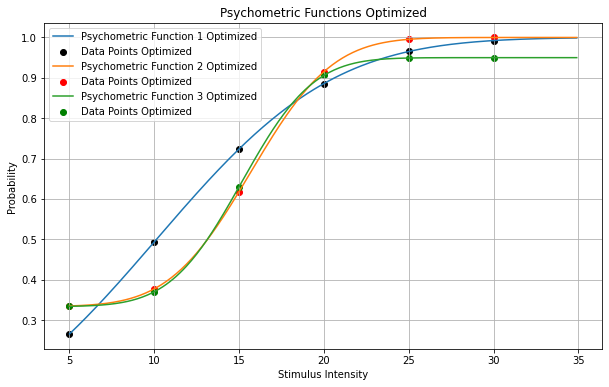

Optimized Parameters:
  c1: 10.131850786071528, sigma1: 8.190823465588204
  c2: 15.692029027493417, sigma2: 3.778083581322479
  c3: 15.153444906940466, sigma3: 3.3061646002491725

Log-likelihood Results:
  Optimized Parameters for Model 1: 11.315347372642556
  Optimized Parameters for Model 2: 7.637350852187257
  Optimized Parameters for Model 3: 10.554681739015605


In [11]:
#Plot
plt.figure(figsize=(10, 6))
plt.plot(I_plot, plot_points_1_optimized, label='Psychometric Function 1 Optimized')
plt.scatter(I, Psycometric_1_optimized, label='Data Points Optimized',color='black')
plt.plot(I_plot, plot_points_2_optimized, label='Psychometric Function 2 Optimized')
plt.scatter(I, Psycometric_2_optimized, label='Data Points Optimized',color='red')
plt.plot(I_plot, plot_points_3_optimized, label='Psychometric Function 3 Optimized')
plt.scatter(I, Psycometric_3_optimized, label='Data Points Optimized',color='green')
plt.xlabel('Stimulus Intensity')
plt.ylabel('Probability')
plt.title('Psychometric Functions Optimized')

plt.grid(True)
plt.legend()
plt.show()

#Parameters
print('Optimized Parameters:')
print(f'  c1: {c1_optimized}, sigma1: {sigma1_optimized}')
print(f'  c2: {c2_optimized}, sigma2: {sigma2_optimized}')
print(f'  c3: {c3_optimized}, sigma3: {sigma3_optimized}')

# Log-likelihood:
print('\nLog-likelihood Results:')
print(f'  Optimized Parameters for Model 1: {result_optimize_1}')
print(f'  Optimized Parameters for Model 2: {result_optimize_2}')
print(f'  Optimized Parameters for Model 3: {result_optimize_3}')